# Comparing consistency across different news outlets, over time

In [19]:
import pickle
import datetime

import THESIS2019.utils.to_lexicon as lex
from THESIS2019.utils.base_words import *
from THESIS2019.utils.get_articles import *

import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

from importlib import reload

import dit
from dit.divergences import jensen_shannon_divergence

In [39]:
# notebook to find consistency over time of topic models using LDA

datapath = "/Users/ninawang/Thesis/remote/THESIS2019/example_data/"
outlets = ["NYT-OPINION","BREITBART", "CNN", "FOX","MSN","NATIONALREVIEW","NPR","REUTERS-POLITICS","SLATE","WASHINGTONEXAMINER"]
articles = get_articles_outlets(datapath,outlets,2012)

for outlet, article in articles.items():
    print("%s has %d articles" %(outlet, len(article)))


NYT-OPINION2012-2013 has 275 articles
BREITBART2012-2013 has 281 articles
CNN2012-2013 has 149 articles
FOX2012-2013 has 300 articles
MSN2012-2013 has 293 articles
NATIONALREVIEW2012-2013 has 289 articles
NPR2012-2013 has 280 articles
REUTERS-POLITICS2012-2013 has 125 articles
SLATE2012-2013 has 131 articles
WASHINGTONEXAMINER2012-2013 has 286 articles


In [28]:
reload(lex)
arts, dictionary, corpus, model = lex.LDA(articles, LEFT_WORDS+RIGHT_WORDS,num_topics=20)


getting docs...
--- 160.5591061115265 seconds ---
getting LDA model...
--- 258.23736095428467 seconds ---


In [47]:
# with open("prelim_model2012.pkl","wb") as f:
#     pickle.dump(model, f)
# with open("prelim_articles2012.pkl","wb") as f:
#     pickle.dump(articles, f)
# with open("prelim_dictionary2012.pkl","wb") as f:
#     pickle.dump(dictionary, f)
# with open("prelim_corpus2012.pkl","wb") as f:
#     pickle.dump(corpus, f)

In [83]:
# LOAD
# with open("../file_transfer/both_tm.pkl","rb") as f:
#     model = pickle.load(f)
# with open("../file_transfer/both_dict.pkl","rb") as f:
#     dictionary = pickle.load(f)
# with open("../file_transfer/both_articles.pkl","rb") as f:
#     articles = pickle.load(f)
# with open("../file_transfer/both_corpus.pkl","rb") as f:
#     corpus = pickle.load(f)

# LOAD
with open("prelim_model2012.pkl","rb") as f:
    model = pickle.load(f)
with open("prelim_dictionary2012.pkl","rb") as f:
    dictionary = pickle.load(f)
with open("prelim_articles2012.pkl","rb") as f:
    articles = pickle.load(f)
with open("prelim_corpus2012.pkl","rb") as f:
    corpus = pickle.load(f)

In [29]:
topics = model.show_topics(num_topics=-1, num_words=25, log=False, formatted=False)
for idx, topic in topics:
    print ("topic " + str(idx) + ": " + (",  ").join([str(t[0]) for t in topic]))
    print ("\n")


topic 0: say,  storm,  report,  citi,  sandi,  power,  state,  new_jersey,  peopl,  flood,  water,  center,  isaac,  area,  louisiana,  resid,  home,  wind,  accord,  get,  close,  hous,  new_orlean,  still,  wednesday


topic 1: say,  israel,  countri,  immigr,  also,  syria,  support,  year,  secur,  nation,  leader,  make,  illeg_immigr,  war,  includ,  group,  isra,  state,  border,  iran,  administr,  peac,  militari,  govern,  peopl


topic 2: say,  percent,  state,  tax,  year,  economi,  job,  pay,  report,  increas,  law,  compani,  work,  also,  nation,  make,  bill,  worker,  govern,  peopl,  busi,  plan,  take,  support,  american


topic 3: know,  think,  peopl,  say,  play,  make,  get,  realli,  come,  thing,  use,  well,  work,  ludden,  flatow,  go,  way,  mean,  part,  also,  kind,  write,  lot,  take,  worker


topic 4: say,  administr,  attack,  report,  white_hous,  offici,  govern,  make,  american,  secur,  know,  also,  use,  benghazi,  includ,  take,  inform,  

In [32]:
# select document
def to_words(bow):
    wds = []
    for idx,c in bow:
        wds.append(dictionary[idx])
    return wds
        
topicn = 4

print(arts[topicn])
print(arts)
print()

print(model[corpus[topicn]])

[<NewsArticle.NewsArticle object at 0x12b5d30f0>, <NewsArticle.NewsArticle object at 0x12b5d39b0>, <NewsArticle.NewsArticle object at 0x1358d6908>, <NewsArticle.NewsArticle object at 0x1358d6cc0>, <NewsArticle.NewsArticle object at 0x1358e05f8>, <NewsArticle.NewsArticle object at 0x1358e0a90>, <NewsArticle.NewsArticle object at 0x1358e2a20>, <NewsArticle.NewsArticle object at 0x1358e2f60>, <NewsArticle.NewsArticle object at 0x1358eb6d8>, <NewsArticle.NewsArticle object at 0x1358ebe80>, <NewsArticle.NewsArticle object at 0x1358edda0>, <NewsArticle.NewsArticle object at 0x135904780>, <NewsArticle.NewsArticle object at 0x135904a58>, <NewsArticle.NewsArticle object at 0x135904f28>, <NewsArticle.NewsArticle object at 0x135904ef0>, <NewsArticle.NewsArticle object at 0x1359142e8>, <NewsArticle.NewsArticle object at 0x135914550>, <NewsArticle.NewsArticle object at 0x13592cac8>, <NewsArticle.NewsArticle object at 0x13592f358>, <NewsArticle.NewsArticle object at 0x13592f438>, <NewsArticle.NewsAr

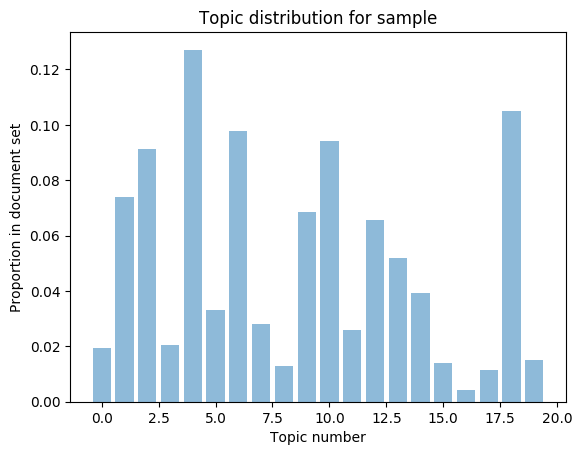

In [50]:
# aggregate topic distribution for a document set
from collections import defaultdict


def total_topic_distribution(model, corpus):
    dist = defaultdict(lambda:0)
    for doc in corpus:
        topics = model[doc]
        for topic,prob in topics:
            dist[topic] += prob    
    # normalize
    s = sum(dist.values())
    for d in dist:
        dist[d] /= s
    return dist

def graph_distribution(dist, title):
    x, y = dist.keys(), dist.values()
    plt.bar(x, y, alpha=0.5)
    plt.xlabel('Topic number')
    plt.ylabel('Proportion in document set')
    plt.title('Topic distribution for %s' %(title))

    plt.show()

        
dist = total_topic_distribution(model, corpus)
graph_distribution(dist, "sample")

In [34]:
dist_list = [(k,v) for k,v in dist.items()]
sorted_dist = sorted(dist_list, key=lambda x:x[1],reverse=True)
print (sorted_dist)

[(4, 0.1271567813742908), (18, 0.10513264305247648), (6, 0.0978383616623404), (10, 0.09421260996338292), (2, 0.09122303500108138), (1, 0.07410335989941651), (9, 0.06869877654668564), (12, 0.0655635572808332), (13, 0.05191941368886993), (14, 0.039191607266950736), (5, 0.03329104783776402), (7, 0.027896952550156343), (11, 0.025815620418048232), (3, 0.020594436078593605), (0, 0.019367893574907213), (19, 0.015003076876811497), (15, 0.014025189563700814), (8, 0.013040989854693597), (17, 0.011598655433799445), (16, 0.004325992075197255)]


In [35]:
# arts = {"2012":[],"2013":[]}
# for i,article in enumerate(articles):
#     if article.date_publish is not None:
#         arts[str(article.date_publish.year)].append(corpus[i])

def to_distro(dist):
    ids, probs = list(dist.keys()), list(dist.values())
    distro = dit.ScalarDistribution(ids, probs)
    return distro

# def compare_topic_distributions(d1, d2):
#     X, Y = to_distro(d1), to_distro(d2)
#     return jensen_shannon_divergence([X,Y])


In [36]:
print(articles.keys())

dict_keys(['NYT-OPINION2012-2013', 'BREITBART2012-2013', 'CNN2012-2013', 'FOX2012-2013', 'MSN2012-2013', 'NATIONALREVIEW2012-2013', 'NPR2012-2013', 'REUTERS-POLITICS2012-2013', 'SLATE2012-2013', 'WASHINGTONEXAMINER2012-2013'])


NYT-OPINION2012-2013 275


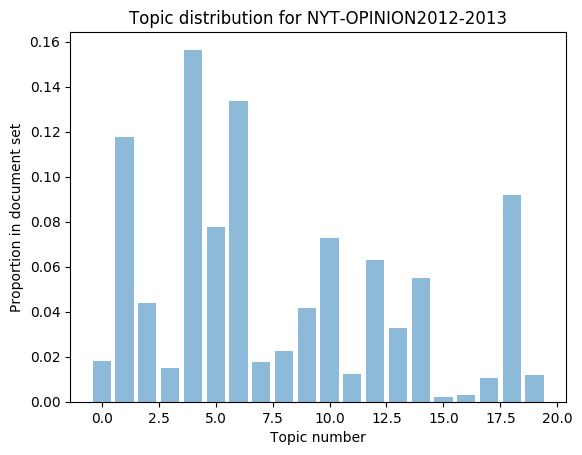

BREITBART2012-2013 281


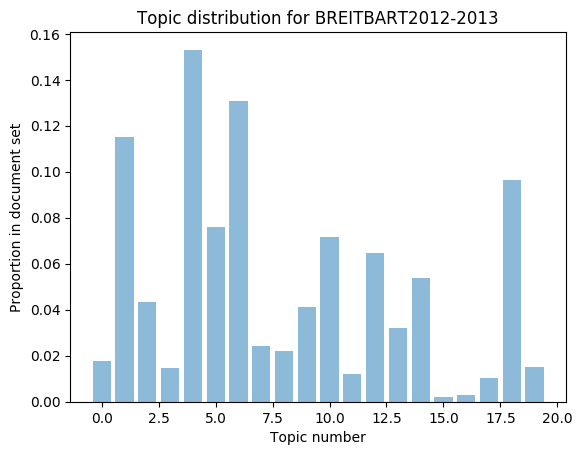

CNN2012-2013 149


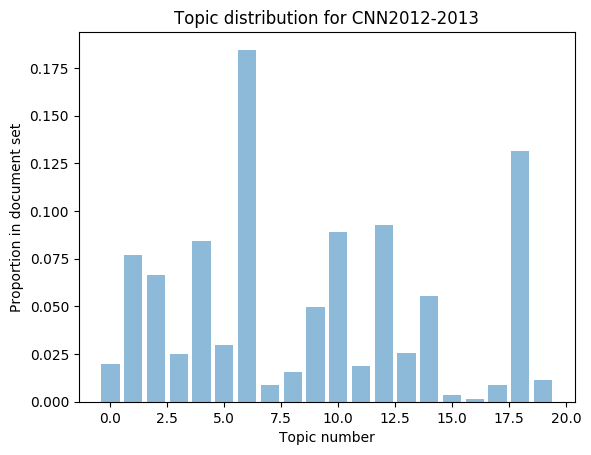

FOX2012-2013 300


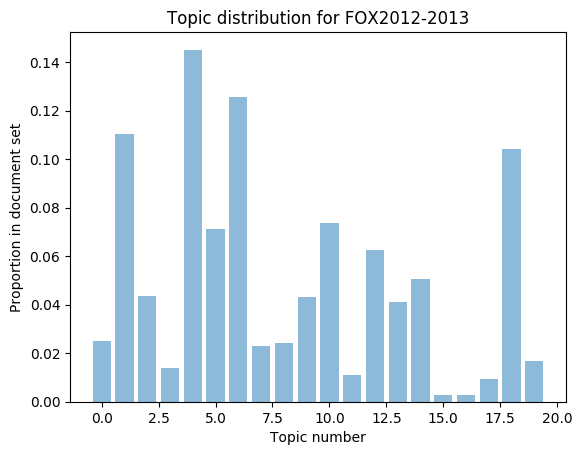

MSN2012-2013 293


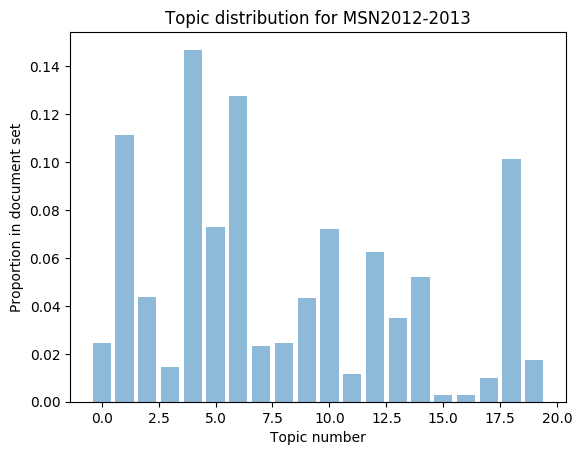

NATIONALREVIEW2012-2013 289


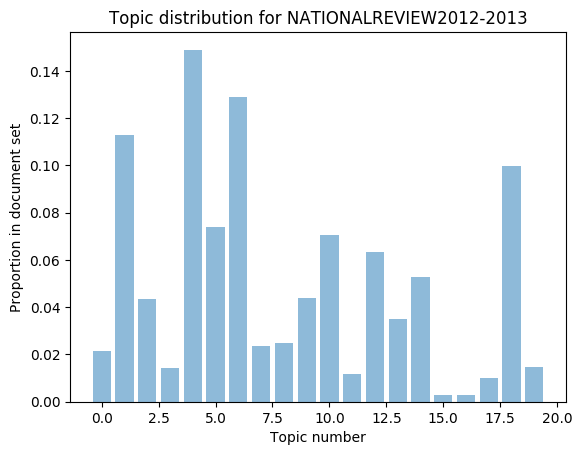

NPR2012-2013 280


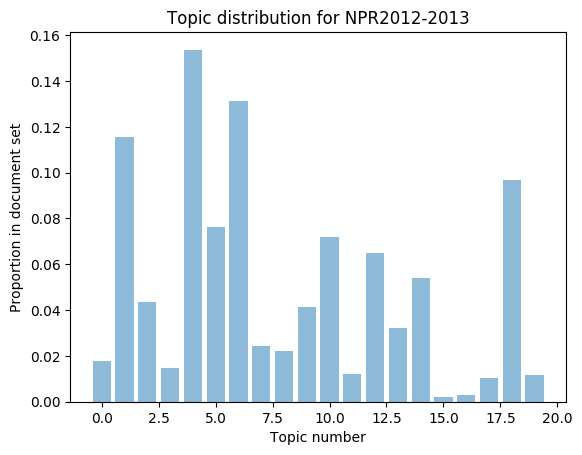

REUTERS-POLITICS2012-2013 125


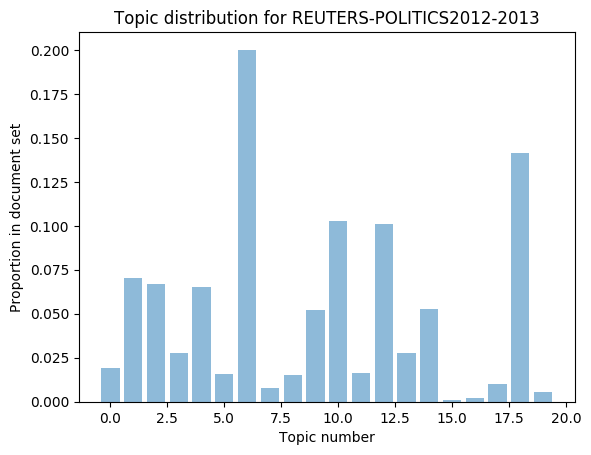

SLATE2012-2013 131


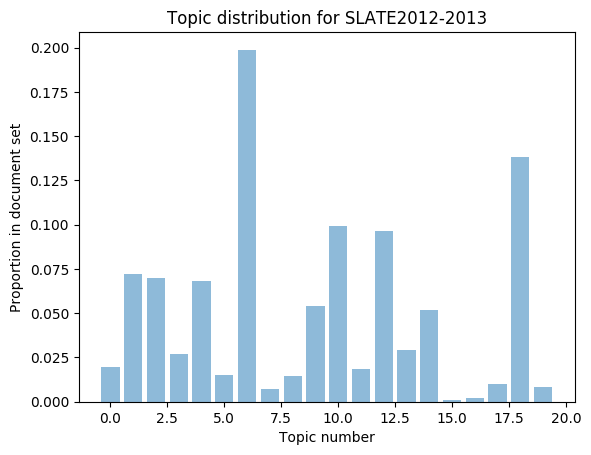

WASHINGTONEXAMINER2012-2013 286


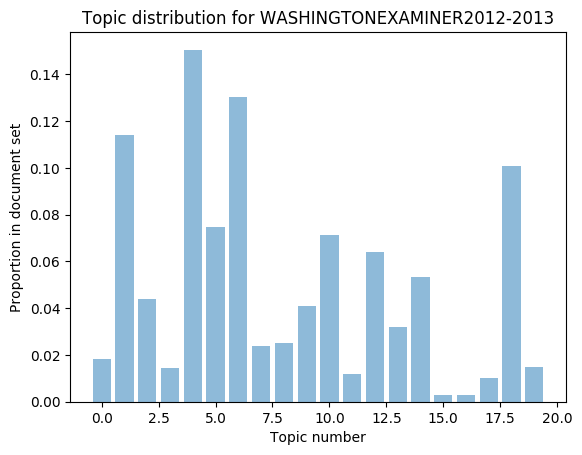

JS Divergence of topic: 0.038693


In [56]:
from THESIS2019.PART1.TopicModel.LDA import lda_consistency as ldac
reload(ldac)

bowarts = {}
for key, articleset in articles.items():
    for i,article in enumerate(articleset):
        if key not in bowarts:
            bowarts[key]=[corpus[i]]
        else:
            bowarts[key].append(corpus[i])

distros=[]
for key,articleset in bowarts.items():
    print(key,len(articleset))
    distro = total_topic_distribution(model, articleset)
    distros.append(distro)
    graph_distribution(distro, key)
    
# dist2012 = total_topic_distribution(model, articles["2012"])
# graph_distribution(dist2012)
# dist2013 = total_topic_distribution(model, arts["2013"])
# graph_distribution(dist2013)

# jsd = compare_topic_distributions(dist2012, dist2013)
jsd = ldac.compare_topic_distributions(distros)
print("JS Divergence of topic: %f"%(jsd))